In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from xgboost import XGBClassifier

In [10]:
ch=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
ch.drop(["customerID"],axis=1,inplace=True)

ch["TotalCharges"][ch["TotalCharges"]==" "]=0
ch["TotalCharges"]=ch["TotalCharges"].astype("float64")

#ch["tenure"][ch["Contract"]=="Month-to-month"]=0
#ch["tenure"][ch["Contract"]=="One year"]=1
#ch["tenure"][ch["Contract"]=="Two year"]=2

C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
ch[["gender","Partner","Dependents","PhoneService",'PaperlessBilling',"Churn"]]=ch[["gender","Partner","Dependents","PhoneService",'PaperlessBilling',"Churn"]].apply(LabelEncoder().fit_transform)
#ch[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',"Churn"]]=ch[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',"Churn"]].apply(LabelEncoder().fit_transform)

u=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaymentMethod']
for i in u:
    m=ch[i].unique()
    m=m+i
    dummy = pd.get_dummies(ch[i],columns=ch[i].unique(),prefix=i)
    ch=pd.concat([ch,dummy],axis=1,sort=True)
    ch.drop([i],axis=1,inplace=True)
ch.drop(['OnlineSecurity_No internet service',"OnlineBackup_No internet service","DeviceProtection_No internet service","TechSupport_No internet service","StreamingTV_No internet service","StreamingMovies_No internet service"],axis=1,inplace=True)

## Feature engineered - SFS - forward

In [4]:
rfc=['gender', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
#f2=['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineBackup_Yes', 'DeviceProtection_No', 'PaymentMethod_Electronic check']
#f3=['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'StreamingTV_No', 'StreamingTV_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)']
#f4=['gender', 'SeniorCitizen', 'Partner', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'MultipleLines_No phone service', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_No', 'StreamingTV_No', 'StreamingTV_Yes']
xgb=['Partner', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']
lr=['SeniorCitizen', 'tenure', 'PhoneService', 'TotalCharges', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'StreamingTV_No', 'StreamingMovies_Yes', 'Contract_One year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
knn=['gender', 'tenure', 'PhoneService', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'Contract_One year', 'PaymentMethod_Bank transfer (automatic)']
nb=['gender', 'Partner', 'tenure', 'PhoneService', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaymentMethod_Electronic check']
tree=['gender', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MultipleLines_No phone service', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'StreamingTV_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year']
f10=['gender', 'Partner', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes', 'PaymentMethod_Bank transfer (automatic)']


featurelist=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10]

In [6]:
rf= RandomForestClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
abc=AdaBoostClassifier()
xgb=XGBClassifier()
lr=LogisticRegression(max_iter=100,n_jobs=4)
knn=KNeighborsClassifier()
nb=GaussianNB()
tree=DecisionTreeClassifier()
#vc=VotingClassifier(estimators=200)
gb= GradientBoostingClassifier()

model=[rf,bc,etc,abc,xgb,lr,knn,nb,tree,gb]
names=["Random forest","Bagging","Extra trees","adaboost","XG Boost","Logistic Regression","K Nearest Neighbors","Decision Tree","Gradient boosting"]    

In [12]:
scores=pd.DataFrame(columns=["index","feature from","model","train score","accuracy score","recall score","precision score","tn","fp","tp","fn"])
j=0
for m,n in zip(featurelist,names):
    x=ch[m]
    y=ch["Churn"]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=101)
    for i,k in zip(model,names):
        i.fit(xtrain,ytrain)
        pred=i.predict(xtest)
        scores.loc[j]=[j,n,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
        j=j+1
scores

,index,feature from,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,Random forest,0.995385,0.760823,0.422977,0.582734,910,116,162,221
1,1,Random forest,Bagging,0.977636,0.755855,0.383812,0.576471,918,108,147,236
2,2,Random forest,Extra trees,0.995385,0.754436,0.428198,0.563574,899,127,164,219
3,3,Random forest,adaboost,0.806887,0.792051,0.477807,0.663043,933,93,183,200
4,4,Random forest,XG Boost,0.819134,0.796309,0.503916,0.665517,929,97,193,190
...,...,...,...,...,...,...,...,...,...,...,...
76,76,Gradient boosting,XG Boost,0.809904,0.787793,0.472585,0.651079,929,97,181,202
77,77,Gradient boosting,Logistic Regression,0.800674,0.792761,0.490862,0.659649,929,97,188,195
78,78,Gradient boosting,K Nearest Neighbors,0.834221,0.762243,0.490862,0.573171,886,140,188,195
79,79,Gradient boosting,Decision Tree,0.731984,0.748048,0.767624,0.525000,760,266,294,89


In [13]:
scores.loc[81]="SFS Reverse"

## Feature engineered - SFS - Reverse

In [17]:
f11=['SeniorCitizen', 'Partner', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No phone service', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check']
f15=['gender', 'Partner', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_Yes', 'TechSupport_No', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
f16=['SeniorCitizen', 'Partner', 'tenure', 'PaperlessBilling', 'TotalCharges', 'InternetService_DSL', 'InternetService_No', 'OnlineSecurity_Yes', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingMovies_No', 'Contract_Month-to-month', 'Contract_One year', 'PaymentMethod_Electronic check']
f17=['SeniorCitizen', 'Dependents', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes', 'StreamingMovies_No', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']
f18=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'TechSupport_Yes', 'StreamingMovies_Yes', 'Contract_One year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check']
f19=['SeniorCitizen', 'tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_Yes', 'InternetService_DSL', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_Yes', 'StreamingMovies_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Electronic check']
f21=['PhoneService', 'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check']
reversefeatures=[f11,f12,f13,f14,f15,f16,f17,f18,f19,f20]

In [16]:
j=82
for m,n in zip(reversefeatures,names):
    x=ch[m]
    y=ch["Churn"]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=101)
    for i,k in zip(model,names):
        i.fit(xtrain,ytrain)
        pred=i.predict(xtest)
        scores.loc[j]=[j,n,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
        j=j+1
scores

,index,feature from,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,Random forest,0.995385,0.760823,0.422977,0.582734,910,116,162,221
1,1,Random forest,Bagging,0.977636,0.755855,0.383812,0.576471,918,108,147,236
2,2,Random forest,Extra trees,0.995385,0.754436,0.428198,0.563574,899,127,164,219
3,3,Random forest,adaboost,0.806887,0.792051,0.477807,0.663043,933,93,183,200
4,4,Random forest,XG Boost,0.819134,0.796309,0.503916,0.665517,929,97,193,190
...,...,...,...,...,...,...,...,...,...,...,...
158,158,Gradient boosting,XG Boost,0.824636,0.797019,0.467363,0.685824,944,82,179,204
159,159,Gradient boosting,Logistic Regression,0.800142,0.79418,0.477807,0.67033,936,90,183,200
160,160,Gradient boosting,K Nearest Neighbors,0.832091,0.745919,0.381201,0.546816,905,121,146,237
161,161,Gradient boosting,Decision Tree,0.746539,0.752307,0.72846,0.532443,781,245,279,104


### RFE 

In [18]:
j=163
n="RFE"
x=ch[f21]
y=ch["Churn"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=101)
for i,k in zip(model,names):
    i.fit(xtrain,ytrain)
    pred=i.predict(xtest)
    scores.loc[j]=[j,n,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
    j=j+1
scores

,index,feature from,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,Random forest,0.995385,0.760823,0.422977,0.582734,910,116,162,221
1,1,Random forest,Bagging,0.977636,0.755855,0.383812,0.576471,918,108,147,236
2,2,Random forest,Extra trees,0.995385,0.754436,0.428198,0.563574,899,127,164,219
3,3,Random forest,adaboost,0.806887,0.792051,0.477807,0.663043,933,93,183,200
4,4,Random forest,XG Boost,0.819134,0.796309,0.503916,0.665517,929,97,193,190
...,...,...,...,...,...,...,...,...,...,...,...
167,167,RFE,XG Boost,0.786475,0.792051,0.511749,0.649007,920,106,196,187
168,168,RFE,Logistic Regression,0.786475,0.792051,0.511749,0.649007,920,106,196,187
169,169,RFE,K Nearest Neighbors,0.741747,0.726047,0.174935,0.489051,956,70,67,316
170,170,RFE,Decision Tree,0.735712,0.750887,0.751958,0.529412,770,256,288,95


In [19]:
scores.to_csv("model after feature enf.csv")

### Label Encoding

In [20]:
scores.loc[172]="Label Encoded Iterations instead of get dummies"

In [21]:
f1=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f2=['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f3=['gender', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f4=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']
f5=['Partner', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f6=['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f7=['gender', 'SeniorCitizen', 'Partner', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges']
f8=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f9=['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges']
f10=['gender', 'Partner', 'Dependents', 'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

featurelist=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10]

In [25]:
j=173
for m,n in zip(featurelist,names):
    x=ch[m]
    y=ch["Churn"]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=101)
    for i,k in zip(model,names):
        i.fit(xtrain,ytrain)
        pred=i.predict(xtest)
        scores.loc[j]=[j,n,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
        j=j+1
scores

,index,feature from,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,Random forest,0.995385,0.760823,0.422977,0.582734,910,116,162,221
1,1,Random forest,Bagging,0.977636,0.755855,0.383812,0.576471,918,108,147,236
2,2,Random forest,Extra trees,0.995385,0.754436,0.428198,0.563574,899,127,164,219
3,3,Random forest,adaboost,0.806887,0.792051,0.477807,0.663043,933,93,183,200
4,4,Random forest,XG Boost,0.819134,0.796309,0.503916,0.665517,929,97,193,190
...,...,...,...,...,...,...,...,...,...,...,...
249,249,Gradient boosting,XG Boost,0.818246,0.800568,0.477807,0.693182,945,81,183,200
250,250,Gradient boosting,Logistic Regression,0.804934,0.793471,0.488251,0.663121,931,95,187,196
251,251,Gradient boosting,K Nearest Neighbors,0.847355,0.758694,0.48564,0.56535,883,143,186,197
252,252,Gradient boosting,Decision Tree,0.753816,0.763662,0.699739,0.55144,808,218,268,115


In [26]:
scores.loc[254]="Reverse sfs"

In [30]:
f11=['gender', 'SeniorCitizen', 'Partner', 'tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f12=['gender', 'SeniorCitizen', 'Partner', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
f13=['gender', 'SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f14=['gender', 'SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f15=['gender', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f16=['SeniorCitizen', 'Partner', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
f17=['gender', 'SeniorCitizen', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
f18=['gender', 'SeniorCitizen', 'Partner', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']
f19=['gender', 'SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
f20=['gender', 'SeniorCitizen', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
reversefeatures=[f11,f12,f13,f14,f15,f16,f17,f18,f19,f20]

In [31]:
j=255
for m,n in zip(reversefeatures,names):
    x=ch[m]
    y=ch["Churn"]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=101)
    for i,k in zip(model,names):
        i.fit(xtrain,ytrain)
        pred=i.predict(xtest)
        scores.loc[j]=[j,n,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
        j=j+1
scores

,index,feature from,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,Random forest,0.995385,0.760823,0.422977,0.582734,910,116,162,221
1,1,Random forest,Bagging,0.977636,0.755855,0.383812,0.576471,918,108,147,236
2,2,Random forest,Extra trees,0.995385,0.754436,0.428198,0.563574,899,127,164,219
3,3,Random forest,adaboost,0.806887,0.792051,0.477807,0.663043,933,93,183,200
4,4,Random forest,XG Boost,0.819134,0.796309,0.503916,0.665517,929,97,193,190
...,...,...,...,...,...,...,...,...,...,...,...
331,331,Gradient boosting,XG Boost,0.824459,0.799148,0.475196,0.689394,944,82,182,201
332,332,Gradient boosting,Logistic Regression,0.799787,0.797019,0.48564,0.676364,937,89,186,197
333,333,Gradient boosting,K Nearest Neighbors,0.832446,0.755145,0.399478,0.570896,911,115,153,230
334,334,Gradient boosting,Decision Tree,0.749024,0.762952,0.697128,0.550515,808,218,267,116


### RFE 

In [33]:
f21=['SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract',
       'PaperlessBilling']

In [34]:
j=337
n="RFE"
x=ch[f21]
y=ch["Churn"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=101)
for i,k in zip(model,names):
    i.fit(xtrain,ytrain)
    pred=i.predict(xtest)
    scores.loc[j]=[j,n,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
    j=j+1
scores

,index,feature from,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,Random forest,0.995385,0.760823,0.422977,0.582734,910,116,162,221
1,1,Random forest,Bagging,0.977636,0.755855,0.383812,0.576471,918,108,147,236
2,2,Random forest,Extra trees,0.995385,0.754436,0.428198,0.563574,899,127,164,219
3,3,Random forest,adaboost,0.806887,0.792051,0.477807,0.663043,933,93,183,200
4,4,Random forest,XG Boost,0.819134,0.796309,0.503916,0.665517,929,97,193,190
...,...,...,...,...,...,...,...,...,...,...,...
341,341,RFE,XG Boost,0.780795,0.771469,0.43342,0.612546,921,105,166,217
342,342,RFE,Logistic Regression,0.778133,0.776437,0.417755,0.634921,934,92,160,223
343,343,RFE,K Nearest Neighbors,0.770678,0.735983,0.43342,0.517134,871,155,166,217
344,344,RFE,Decision Tree,0.741392,0.731725,0.631854,0.505219,789,237,242,141


In [36]:
scores.to_csv("models after feature selection.csv")

In [12]:
x=ch[['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'StreamingTV_No', 'StreamingTV_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)']] 
y=ch["Churn"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=1109)

In [8]:
scores=pd.DataFrame(columns=["index","model","train score","accuracy score","recall score","precision score","tn","fp","tp","fn"])
j=0
for i,k in zip(model,names):
    i.fit(xtrain,ytrain)
    pred=i.predict(xtest)
    scores.loc[j]=[j,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
    j=j+1
scores

,index,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,0.997693,0.800568,0.536649,0.663430,923,104,205,177
1,1,Bagging,0.979588,0.784954,0.481675,0.636678,922,105,184,198
2,2,Extra trees,0.997693,0.775018,0.507853,0.600619,898,129,194,188
3,3,adaboost,0.804402,0.811923,0.560209,0.688103,930,97,214,168
4,4,XG Boost,0.819844,0.804116,0.541885,0.672078,926,101,207,175
5,5,Logistic Regression,0.807952,0.810504,0.570681,0.679128,924,103,218,164
6,6,K Nearest Neighbors,0.997693,0.779986,0.424084,0.642857,937,90,162,220
7,7,Decision Tree,0.732694,0.755855,0.827225,0.531987,749,278,316,66
8,8,Gradient boosting,0.997693,0.745209,0.539267,0.529563,844,183,206,176


In [25]:
x=ch.drop(["Churn"],axis=1)
y=ch["Churn"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=478)

In [9]:
scores=pd.DataFrame(columns=["index","model","train score","accuracy score","recall score","precision score","tn","fp","tp","fn"])
j=0
for i,k in zip(model,names):
    i.fit(xtrain,ytrain)
    pred=np.where(i.predict_proba(xtest)[:,1] > 0.25, 1, 0)
    scores.loc[j]=[j,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
    j=j+1
scores

,index,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,0.997693,0.745919,0.824607,0.519802,736,291,315,67
1,1,Bagging,0.978878,0.701207,0.787958,0.469579,687,340,301,81
2,2,Extra trees,0.997693,0.711852,0.756545,0.480066,714,313,289,93
3,3,adaboost,0.804402,0.271114,1.000000,0.271114,0,1027,382,0
4,4,XG Boost,0.819844,0.753726,0.837696,0.528926,742,285,320,62
5,5,Logistic Regression,0.807952,0.753016,0.869110,0.526984,729,298,332,50
6,6,K Nearest Neighbors,0.997693,0.709013,0.743455,0.476510,715,312,284,98
7,7,Decision Tree,0.732694,0.742370,0.848168,0.515103,722,305,324,58
8,8,Gradient boosting,0.997693,0.756565,0.544503,0.551724,858,169,208,174


In [100]:
pred=np.where(lr.predict_proba(xtest)[:,1] > 0.25, 1, 0)
print(accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred))
confusion_matrix(ytest,pred)

0.7601135557132718 0.8232189973614775 0.5351629502572899


array([[759, 271],
       [ 67, 312]], dtype=int64)

In [51]:
lr=LogisticRegression(max_iter=1000)

In [62]:
sc=StandardScaler()
ch["tenure"]=sc.fit_transform(ch[["tenure"]])
ch["TotalCharges"]=sc.fit_transform(ch[["TotalCharges"]])
ch["MonthlyCharges"]=sc.fit_transform(ch[["MonthlyCharges"]])

In [63]:
ch["tenure"]

0      -1.277445
1       0.066327
2      -1.236724
3       0.514251
4      -1.236724
          ...   
7038   -0.340876
7039    1.613701
7040   -0.870241
7041   -1.155283
7042    1.369379
Name: tenure, Length: 7043, dtype: float64

In [85]:
sc=pd.DataFrame(columns=["index","accuracy score","recall","precision"])
for i in range(0,1111):
    lr=LogisticRegression(n_jobs=6,max_iter=1000)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=i)
    lr.fit(xtrain,ytrain)
    pred=np.where(lr.predict_proba(xtest)[:,1] > 0.25, 1, 0)
    sc.loc[i]=[i,accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred)]
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [94]:
sc[sc["recall"]>0.87]

,index,accuracy score,recall,precision
18,18.0,0.746629,0.871795,0.495146
166,166.0,0.750177,0.871314,0.516693
239,239.0,0.745919,0.870370,0.515674
463,463.0,0.747339,0.870690,0.493485
515,515.0,0.723918,0.873239,0.474006
673,673.0,0.755855,0.870229,0.538583
1057,1057.0,0.750887,0.874346,0.524333


In [108]:
sc[(sc["index"]==1057) | (sc["index"]==1109)]

,index,accuracy score,recall,precision
1057,1057.0,0.750887,0.874346,0.524333
1109,1109.0,0.760823,0.825858,0.535959


In [110]:
sc=pd.DataFrame(columns=["index","accuracy score","recall","precision"])
for i in range(0,1111):
    xgb=XGBClassifier(n_estimators=500,n_jobs=6)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=i)
    xgb.fit(xtrain,ytrain)
    pred=xgb.predict(xtest)
    sc.loc[i]=[i,accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred)]
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [112]:
sc[sc["accuracy score"]>0.82]

,index,accuracy score,recall,precision
43,43.0,0.820440,0.562162,0.695652
539,539.0,0.822569,0.556180,0.682759
818,818.0,0.820440,0.550562,0.678201
1003,1003.0,0.826118,0.594828,0.665595


In [21]:
sc=pd.DataFrame(columns=["index","accuracy score","recall","precision"])
for i in range(0,1111):
    lr=LogisticRegression(n_jobs=6,max_iter=1000)
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=i)
    lr.fit(xtrain,ytrain)
    pred=np.where(lr.predict_proba(xtest)[:,1] > 0.25, 1, 0)
    sc.loc[i]=[i,accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred)]
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [24]:
sc[sc["recall"]>0.86]

,index,accuracy score,recall,precision
18,18.0,0.750177,0.871795,0.499184
134,134.0,0.748758,0.860406,0.531348
239,239.0,0.750887,0.875661,0.521260
313,313.0,0.744500,0.862434,0.514196
463,463.0,0.749468,0.870690,0.495908
478,478.0,0.770759,0.870647,0.563607
515,515.0,0.721789,0.867606,0.471669
625,625.0,0.763662,0.863524,0.555911
673,673.0,0.760823,0.862595,0.545016
930,930.0,0.748758,0.860656,0.509709


In [22]:
sc.max()

index             1110.000000
accuracy score       0.775727
recall               0.875661
precision            0.571192
dtype: float64

In [144]:
tree=DecisionTreeClassifier()
param = {"criterion":["gini","entropy"]}
gs=GridSearchCV(tree,param,cv=4,scoring="f1_weighted")
gs.fit(xtrain,ytrain)
gs.best_params_

{'criterion': 'entropy'}

In [142]:
#KNN
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier(n_jobs=-1)
param={"n_neighbors":np.arange(1,50),"weights":["uniform","distance"]}
CV_rfc= GridSearchCV(estimator=knn,param_grid=param, cv=3, scoring="f1_weighted")
CV_rfc.fit(xtrain,ytrain)
CV_rfc.best_params_

{'n_neighbors': 19, 'weights': 'distance'}

In [143]:
rfc= RandomForestClassifier(n_jobs=-1)
param_grid={ "n_estimators":[200,700],"max_features":["auto","sqrt","log2"]}
CV_rfc= GridSearchCV(rfc,param_grid, cv=5)
CV_rfc.fit(xtrain,ytrain)
CV_rfc.best_params_

{'max_features': 'log2', 'n_estimators': 700}

In [7]:
rf= RandomForestClassifier(n_estimators=700,max_features="log2")
bc=BaggingClassifier()
etc=ExtraTreesClassifier(n_estimators=1000)
abc=AdaBoostClassifier(base_estimator=lr)
xgb=XGBClassifier()
lr=LogisticRegression(max_iter=1000,n_jobs=4)
knn=KNeighborsClassifier(n_neighbors=19, weights="distance")
nb=GaussianNB()
tree=DecisionTreeClassifier(criterion="entropy")
#vc=VotingClassifier(estimators=200)
gb= GradientBoostingClassifier()

model=[rf,bc,etc,abc,xgb,lr,knn,nb,tree,gb]
names=["Random forest","Bagging","Extra trees","adaboost","XG Boost","Logistic Regression","K Nearest Neighbors","Decision Tree","Gradient boosting"]    

In [26]:
scores=pd.DataFrame(columns=["index","model","train score","accuracy score","recall score","precision score","tn","fp","tp","fn"])
j=0
for i,k in zip(model,names):
    i.fit(xtrain,ytrain)
    pred=i.predict(xtest)
    scores.loc[j]=[j,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
    j=j+1
scores

,index,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,0.997693,0.792761,0.524876,0.676282,906,101,211,191
1,1,Bagging,0.980298,0.777147,0.455224,0.658273,912,95,183,219
2,2,Extra trees,0.997693,0.775727,0.502488,0.635220,891,116,202,200
3,3,adaboost,0.806177,0.811214,0.544776,0.725166,924,83,219,183
4,4,XG Boost,0.820554,0.806246,0.532338,0.715719,922,85,214,188
5,5,Logistic Regression,0.804579,0.813343,0.574627,0.715170,915,92,231,171
6,6,K Nearest Neighbors,0.997693,0.785664,0.427861,0.704918,935,72,172,230
7,7,Decision Tree,0.683351,0.713982,0.883085,0.499297,651,356,355,47
8,8,Gradient boosting,0.997693,0.739532,0.547264,0.543210,822,185,220,182


In [27]:
scores=pd.DataFrame(columns=["index","model","train score","accuracy score","recall score","precision score","tn","fp","tp","fn"])
j=0
for i,k in zip(model,names):
    i.fit(xtrain,ytrain)
    pred=np.where(i.predict_proba(xtest)[:,1] > 0.25, 1, 0)
    scores.loc[j]=[j,k,i.score(xtrain,ytrain),accuracy_score(ytest,pred),recall_score(ytest,pred),precision_score(ytest,pred),confusion_matrix(ytest,pred)[0,0],confusion_matrix(ytest,pred)[0,1],confusion_matrix(ytest,pred)[1,1],confusion_matrix(ytest,pred)[1,0]]
    j=j+1
scores

,index,model,train score,accuracy score,recall score,precision score,tn,fp,tp,fn
0,0,Random forest,0.997693,0.752307,0.813433,0.544093,733,274,327,75
1,1,Bagging,0.978701,0.728886,0.796020,0.516129,707,300,320,82
2,2,Extra trees,0.997693,0.733854,0.746269,0.523560,734,273,300,102
3,3,adaboost,0.806177,0.285309,1.000000,0.285309,0,1007,402,0
4,4,XG Boost,0.820554,0.767211,0.843284,0.561258,742,265,339,63
5,5,Logistic Regression,0.804579,0.770759,0.870647,0.563607,736,271,350,52
6,6,K Nearest Neighbors,0.997693,0.709723,0.763682,0.494364,693,314,307,95
7,7,Decision Tree,0.683351,0.706175,0.898010,0.491826,634,373,361,41
8,8,Gradient boosting,0.997693,0.738822,0.532338,0.543147,827,180,214,188


In [32]:
ypred_proba=np.where(lr.predict_proba(xtest)[:,1] > 0.25, 1, 0)
ypred=lr.predict(xtest)
print(accuracy_score(ytest,ypred),recall_score(ytest,ypred))

0.8225691980127751 0.6069651741293532


In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

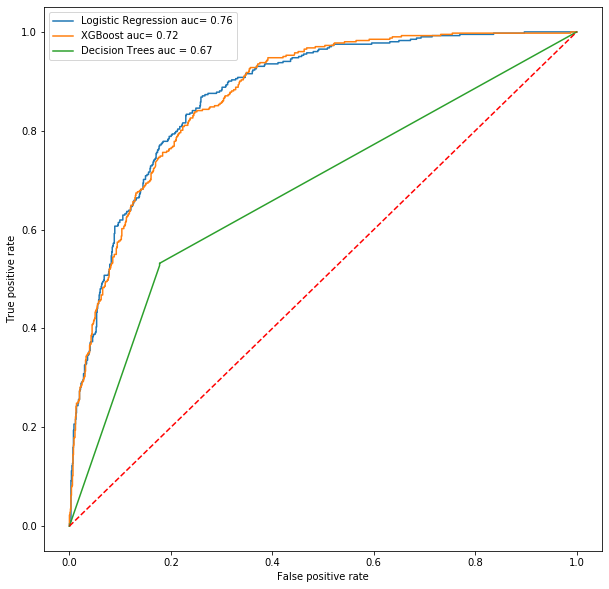

In [103]:
plt.figure(figsize=[10,10])

roc_auc=roc_auc_score(ytest,ypred)
fpr,tpr,thresholds =roc_curve(ytest,lr.predict_proba(xtest)[:,1])

plt.plot(fpr,tpr,label='Logistic Regression auc= %0.2f' % roc_auc)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
roc_auc1=roc_auc_score(ytest,xgb.predict(xtest))
fpr1,tpr1,thresholds1 =roc_curve(ytest,xgb.predict_proba(xtest)[:,1])
plt.plot(fpr1,tpr1,label="XGBoost auc= %0.2f" % roc_auc1)

roc_auc2=roc_auc_score(ytest,tree.predict(xtest))
fpr2,tpr2,thresholds2 =roc_curve(ytest,tree.predict_proba(xtest)[:,1])
plt.plot(fpr2,tpr2,label="Decision Trees auc = %0.2f" % roc_auc2)


plt.plot([0,1],[0,1],"r--")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

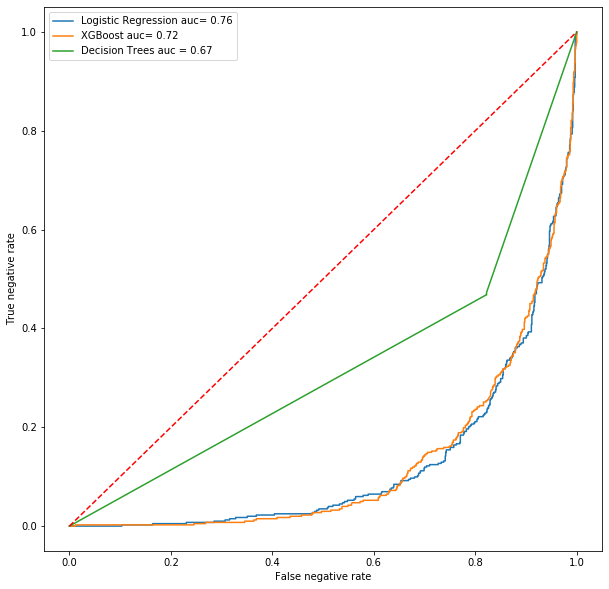

In [98]:
plt.figure(figsize=[10,10])

roc_auc=roc_auc_score(ytest,ypred)
fpr,tpr,thresholds =roc_curve(ytest,lr.predict_proba(xtest)[:,0])

plt.plot(fpr,tpr,label='Logistic Regression auc= %0.2f' % roc_auc)
plt.xlabel("False negative rate")
plt.ylabel("True negative rate")
roc_auc1=roc_auc_score(ytest,xgb.predict(xtest))
fpr1,tpr1,thresholds1 =roc_curve(ytest,xgb.predict_proba(xtest)[:,0])
plt.plot(fpr1,tpr1,label="XGBoost auc= %0.2f" % roc_auc1)

roc_auc2=roc_auc_score(ytest,tree.predict(xtest))
fpr2,tpr2,thresholds2 =roc_curve(ytest,tree.predict_proba(xtest)[:,0])
plt.plot(fpr2,tpr2,label="Decision Trees auc = %0.2f" % roc_auc2)
plt.plot([0,1],[0,1],"r--")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend()
plt.show()

NameError: name 'lr' is not defined